## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("data\stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
### Preparing X and Y
X=df.drop('math_score',axis=1)
y=df['math_score']

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("StandardScaler",numeric_transformer,num_features),
        ("OneHotEncoder",oh_transformer,cat_features),
    ]
)

In [8]:
X=preprocessor.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#### Create an Evaluate Function to give all metrics after model Training

In [10]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    score = r2_score(true,predicted)
    return mae,rmse,score
    

In [11]:
models ={
    "LinearRegression":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False)
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    ## make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## score
    mae,rmse,score = evaluate_model(y_test,y_test_pred)
    train_mae,train_rmse,train_score = evaluate_model(y_train,y_train_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse))
    print("- Mean Absolute Error: {:.4f}".format(mae))
    print("- R2 Score: {:.4f}".format(score))
    r2_list.append(score)
    
    print('='*35)
    print('\n')  
    

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


RandomForestRegressor
Model performance for Training set
- Root Mean Squared Error: 2.2952
- Mean Absolute Error: 1.8202
- R2 Score: 0.9766
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9582
- Mean Absolute Error: 4.5932
- R2 Score: 0.8541


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5958
- Mean Absolute Error: 5.1036
- R2 Score: 0.8212


AdaBoostRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7717
- Mean Absolute Error: 4.7172
- R2 Score: 0.8522
-----

In [12]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','score']).sort_values('score',ascending=False)

,model,score
4,Ridge,0.880593
0,LinearRegression,0.880433
1,RandomForestRegressor,0.854114
3,AdaBoostRegressor,0.853052
8,CatBoostRegressor,0.851632
5,Lasso,0.825320
2,XGBRegressor,0.821221
7,KNeighborsRegressor,0.783770
6,DecisionTreeRegressor,0.749444


In [15]:
linear = LinearRegression()
linear_m=linear.fit(X_train,y_train)

In [16]:
y_pred = linear_m.predict(X_test)

In [19]:
score=r2_score(y_test,y_pred)*100

In [23]:
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


#### visualize the model for y_test,y_pred

Text(0, 0.5, 'y_pred')

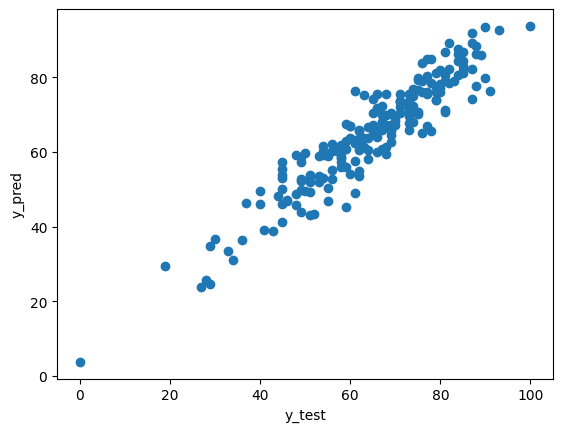

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

### Difference between actual and predicted value

In [26]:
pred_df = pd.DataFrame({'Actual_value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred})

In [28]:
pred_df.head()

,Actual_value,predicted_value,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
